# Analysis of PMAT ROIs

In [1]:
import os
import matplotlib.pyplot as plt

from wikisim import rsa
from wikisim import figures

rsa_dir = '/Users/morton/Dropbox/work/bender/batch/rsa'
fig_dir = '/Users/morton/Dropbox/work/bender/figs_wikisim3/rois'
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

# controls plot precision; use 1000 for testing, 100000 for final
opt = {
    'n_perm': 100000, 'n_boot': 100000, 'max_offset': 4.7,
    'sig_offset': 4.4
}
figsize = (8.5, 3)

rois = rsa.get_rois('pm-at')

## Face semantics

Controlling for just the visual model, adding gender, and adding occupation.

In [2]:
zstat_face_hmx_use = rsa.load_net_zstat(
    rsa_dir, 'prsa_hmx_use', 'face', rois
)
zstat_face_hmx_sub_use = rsa.load_net_zstat(
    rsa_dir, 'prsa_hmx_sub_use', 'face', rois
)
zstat_face_hmx_sub_occ_use = rsa.load_net_zstat(
    rsa_dir, 'prsa_hmx_sub_occ_use', 'face', rois
)

In [3]:
rsa.roi_zstat_perm(
    zstat_face_hmx_use.query('net == "AT"'), 'wiki_use1', 
    n_perm=100000, method='t'
)

,t,p,q,ERstar,rstarb,r,mean,std,sem,d
roi,,,,,,,,,,
PRC,0.215698,0.415296,0.907521,3.309977,7.0,7.0,0.039267,1.045787,0.182048,0.037548
AMYG,1.487023,0.073398,0.117560,0.587884,3.0,5.0,0.281969,1.089284,0.189620,0.258857
FUS,1.951550,0.029896,0.059905,0.239648,1.0,4.0,0.312552,0.920025,0.160156,0.339721
ITC,0.904618,0.186214,0.644544,1.481715,5.0,6.0,0.191358,1.215173,0.211534,0.157474
TPO,0.143430,0.443425,0.923611,3.536075,7.0,8.0,0.027258,1.091725,0.190045,0.024968
OPER,2.170557,0.018747,0.050585,0.151848,1.0,3.0,0.377055,0.997909,0.173714,0.377845
TRIA,3.817813,0.000291,0.002848,0.002850,0.0,1.0,0.666371,1.002670,0.174542,0.664596
OFC,2.206208,0.017334,0.070129,0.140379,1.0,2.0,0.361998,0.942577,0.164082,0.384051


In [4]:
rsa.roi_zstat_perm(
    zstat_face_hmx_use.query('net == "PM"'), 'wiki_use1', 
    n_perm=100000, method='t'
)

,t,p,q,ERstar,rstarb,r,mean,std,sem,d
roi,,,,,,,,,,
ANG,0.333925,0.370307,0.759592,1.477735,4.0,1.0,0.055972,0.962900,0.167619,0.058129
PREC,-0.136669,0.553926,0.911521,2.213738,4.0,3.0,-0.028630,1.203399,0.209485,0.023791
PCC,-0.535040,0.701840,0.971440,2.807752,4.0,4.0,-0.101124,1.085735,0.189002,0.093139
PHC,0.299202,0.383360,0.773692,1.530255,4.0,2.0,0.051263,0.984233,0.171333,0.052084


,t,p,q,ERstar,rstarb,r,mean,std,sem,d
roi,,,,,,,,,,
ANG,0.333925,0.370307,0.756312,1.475835,4.0,1.0,0.055972,0.962900,0.167619,0.058129
PREC,-0.136669,0.553926,0.909611,2.210568,4.0,3.0,-0.028630,1.203399,0.209485,0.023791
PCC,-0.535040,0.701840,0.970960,2.806962,4.0,4.0,-0.101124,1.085735,0.189002,0.093139
PHC,0.299202,0.383360,0.770952,1.528335,4.0,2.0,0.051263,0.984233,0.171333,0.052084
PRC,0.215698,0.415296,0.908651,3.322087,7.0,7.0,0.039267,1.045787,0.182048,0.037548
AMYG,1.487023,0.073398,0.118289,0.592014,3.0,5.0,0.281969,1.089284,0.189620,0.258857
FUS,1.951550,0.029896,0.061158,0.244988,1.0,4.0,0.312552,0.920025,0.160156,0.339721
ITC,0.904618,0.186214,0.645964,1.491805,5.0,6.0,0.191358,1.215173,0.211534,0.157474
TPO,0.143430,0.443425,0.924201,3.547645,7.0,8.0,0.027258,1.091725,0.190045,0.024968


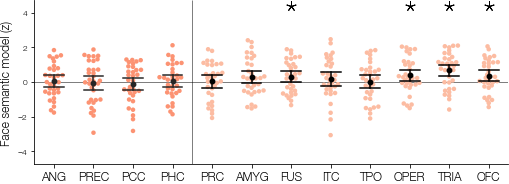

In [38]:
fig, ax = plt.subplots(figsize=figsize)
sig = figures.plot_zstat_perm(
    zstat_face_hmx_use, 'wiki_use1', 'face', method='t', 
    sig_col='q', sig_alpha=0.1, by_network=True, ax=ax, **opt
)
fig.savefig(os.path.join(fig_dir, 'prsa_pmat_face_use.pdf'))
sig

In [6]:
rsa.roi_zstat_perm(
    zstat_face_hmx_sub_use.query('roi == "FUS" or roi == "OPER" or roi == "TRIA" or roi == "OFC"'), 'wiki_use1', 
    n_perm=100000, method='t'
)

,t,p,q,ERstar,rstarb,r,mean,std,sem,d
roi,,,,,,,,,,
FUS,1.894478,0.033615,0.044176,0.132439,1.0,3.0,0.298186,0.904180,0.157398,0.329786
OPER,1.844107,0.037222,0.036801,0.147139,1.0,4.0,0.324177,1.009841,0.175791,0.321018
TRIA,3.491673,0.000712,0.003049,0.003050,0.0,1.0,0.618352,1.017324,0.177093,0.607822
OFC,2.056673,0.023974,0.047235,0.094399,1.0,2.0,0.334676,0.934795,0.162727,0.358021


In [7]:
rsa.roi_zstat_perm(
    zstat_face_hmx_sub_occ_use.query('roi == "FUS" or roi == "OPER" or roi == "TRIA" or roi == "OFC"'), 'wiki_use1', 
    n_perm=100000, method='t'
)

,t,p,q,ERstar,rstarb,r,mean,std,sem,d
roi,,,,,,,,,,
FUS,1.403115,0.085106,0.273307,0.348047,2.0,1.0,0.196714,0.805376,0.140198,0.244251
OPER,0.758072,0.226977,0.580874,0.929181,3.0,2.0,0.163285,1.237351,0.215395,0.131963
TRIA,0.459408,0.324524,0.722983,1.316877,3.0,4.0,0.106975,1.337649,0.232855,0.079973
OFC,0.492188,0.312973,0.708853,1.271487,3.0,3.0,0.094324,1.100901,0.191642,0.085679


## Scene semantics

Controlling for just the visual model, then adding visual category and subcategory.

In [8]:
zstat_scene_hmx_use = rsa.load_net_zstat(
    rsa_dir, 'prsa_hmx_use', 'scene', rois
)
zstat_scene_hmx_sub_typ_use = rsa.load_net_zstat(
    rsa_dir, 'prsa_hmx_sub_typ_use', 'scene', rois
)

In [9]:
rsa.roi_zstat_perm(
    zstat_scene_hmx_use.query('net == "PM"'), 'wiki_use1', 
    n_perm=100000, method='t'
)

,t,p,q,ERstar,rstarb,r,mean,std,sem,d
roi,,,,,,,,,,
ANG,2.020636,0.025876,0.025753,0.102999,1.0,4.0,0.368599,1.047908,0.182417,0.351747
PREC,3.716932,0.000385,0.000830,0.001660,0.0,2.0,0.464053,0.717199,0.124848,0.647035
PCC,3.840700,0.000273,0.001180,0.001180,0.0,1.0,0.502577,0.751708,0.130856,0.668580
PHC,2.612724,0.006785,0.008914,0.026740,0.0,3.0,0.486554,1.069781,0.186225,0.454817


In [10]:
rsa.roi_zstat_perm(
    zstat_scene_hmx_use.query('net == "AT"'), 'wiki_use1', 
    n_perm=100000, method='t'
)

,t,p,q,ERstar,rstarb,r,mean,std,sem,d
roi,,,,,,,,,,
PRC,1.098003,0.140198,0.619614,1.117699,3.0,3.0,0.185048,0.968137,0.168531,0.191138
AMYG,-0.498866,0.689357,0.998520,5.522425,8.0,7.0,-0.078443,0.903290,0.157243,0.086841
FUS,2.769339,0.004635,0.037926,0.037960,0.0,1.0,0.414860,0.860562,0.149805,0.482080
ITC,-1.561891,0.935925,1.000000,7.488905,8.0,8.0,-0.189110,0.695538,0.121078,0.271890
TPO,-0.239053,0.593705,0.993250,4.750042,7.0,6.0,-0.039014,0.937531,0.163203,0.041614
OPER,0.154142,0.439233,0.963510,3.511385,7.0,5.0,0.023927,0.891695,0.155224,0.026833
TRIA,0.170313,0.432918,0.961310,3.460695,7.0,4.0,0.029467,0.993906,0.173017,0.029648
OFC,1.881750,0.034496,0.137717,0.275347,1.0,2.0,0.262786,0.802227,0.139650,0.327571


,t,p,q,ERstar,rstarb,r,mean,std,sem,d
roi,,,,,,,,,,
ANG,2.020636,0.025876,0.026096,0.104409,1.0,4.0,0.368599,1.047908,0.182417,0.351747
PREC,3.716932,0.000385,0.000775,0.001550,0.0,2.0,0.464053,0.717199,0.124848,0.647035
PCC,3.840700,0.000273,0.001110,0.001110,0.0,1.0,0.502577,0.751708,0.130856,0.668580
PHC,2.612724,0.006785,0.009222,0.027670,0.0,3.0,0.486554,1.069781,0.186225,0.454817
PRC,1.098003,0.140198,0.620084,1.118009,4.0,3.0,0.185048,0.968137,0.168531,0.191138
AMYG,-0.498866,0.689357,0.998560,5.517855,8.0,7.0,-0.078443,0.903290,0.157243,0.086841
FUS,2.769339,0.004635,0.038032,0.038070,0.0,1.0,0.414860,0.860562,0.149805,0.482080
ITC,-1.561891,0.935925,1.000000,7.486865,8.0,8.0,-0.189110,0.695538,0.121078,0.271890
TPO,-0.239053,0.593705,0.993500,4.747373,7.0,6.0,-0.039014,0.937531,0.163203,0.041614


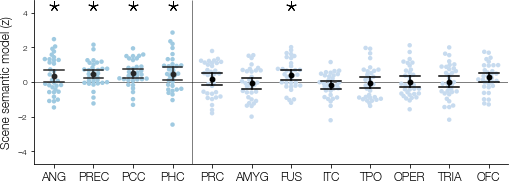

In [39]:
fig, ax = plt.subplots(figsize=figsize)
sig = figures.plot_zstat_perm(
    zstat_scene_hmx_use, 'wiki_use1', 'scene', method='t', 
    sig_col='q', sig_alpha=0.1, by_network=True, ax=ax, **opt
)
fig.savefig(os.path.join(fig_dir, 'prsa_pmat_scene_use.pdf'))
sig

In [12]:
rsa.roi_zstat_perm(
    zstat_scene_hmx_sub_typ_use.query('net == "PM" or roi == "FUS"'), 'wiki_use1', 
    n_perm=100000, method='t'
)

,t,p,q,ERstar,rstarb,r,mean,std,sem,d
roi,,,,,,,,,,
ANG,0.023425,0.490728,0.909251,2.454275,5.0,5.0,0.004720,1.157581,0.201509,0.004078
PREC,1.165056,0.126304,0.211727,0.636164,2.0,3.0,0.217916,1.074484,0.187044,0.202810
PCC,2.770219,0.004624,0.023754,0.023770,0.0,1.0,0.432911,0.897721,0.156273,0.482233
PHC,1.253613,0.109532,0.382026,0.552564,2.0,2.0,0.264159,1.210486,0.210718,0.218226
FUS,0.184166,0.427523,0.865641,2.139299,5.0,4.0,0.036686,1.144333,0.199203,0.032059


## Scene geography

In [13]:
zstat_scene_hmx_use_geo = rsa.load_net_zstat(
    rsa_dir, 'prsa_hmx_use_geo', 'scene', rois
)
zstat_scene_hmx_reg_use_geo = rsa.load_net_zstat(
    rsa_dir, 'prsa_hmx_use_reg_geo', 'scene', rois
)

In [14]:
rsa.roi_zstat_perm(
    zstat_scene_hmx_use_geo.query('net == "PM"'), 'geo', 
    n_perm=100000, method='t'
)

,t,p,q,ERstar,rstarb,r,mean,std,sem,d
roi,,,,,,,,,,
ANG,0.797923,0.215399,0.506855,0.855531,3.0,3.0,0.139193,1.002109,0.174445,0.138901
PREC,2.253449,0.015608,0.055339,0.061979,1.0,1.0,0.392306,1.000079,0.174091,0.392275
PCC,0.545731,0.294518,0.627354,1.174028,3.0,4.0,0.100904,1.062154,0.184897,0.095000
PHC,1.789277,0.041520,0.082447,0.164788,1.0,2.0,0.340221,1.092297,0.190144,0.311473


In [15]:
rsa.roi_zstat_perm(
    zstat_scene_hmx_use_geo.query('net == "AT"'), 'geo', 
    n_perm=100000, method='t'
)

,t,p,q,ERstar,rstarb,r,mean,std,sem,d
roi,,,,,,,,,,
PRC,1.010268,0.159973,0.680313,1.289577,4.0,3.0,0.212763,1.209806,0.210600,0.175865
AMYG,1.769004,0.043212,0.271717,0.348387,2.0,1.0,0.306625,0.995716,0.173332,0.307944
FUS,1.383241,0.088083,0.470805,0.713303,3.0,2.0,0.287797,1.195215,0.208060,0.240791
ITC,-0.904965,0.813876,0.999970,6.507435,8.0,8.0,-0.166885,1.059358,0.184410,0.157534
TPO,0.001211,0.499521,0.982810,3.993690,7.0,6.0,0.000235,1.113456,0.193828,0.000211
OPER,-0.878231,0.806817,0.999960,6.451055,8.0,7.0,-0.166486,1.088994,0.189569,0.152880
TRIA,0.195191,0.423239,0.962600,3.386386,6.0,5.0,0.032390,0.953259,0.165941,0.033978
OFC,0.355917,0.362119,0.934951,2.899891,6.0,4.0,0.065251,1.053162,0.183332,0.061957


,t,p,q,ERstar,rstarb,r,mean,std,sem,d
roi,,,,,,,,,,
ANG,0.797923,0.215399,0.509865,0.858171,3.0,3.0,0.139193,1.002109,0.174445,0.138901
PREC,2.253449,0.015608,0.055719,0.062909,1.0,1.0,0.392306,1.000079,0.174091,0.392275
PCC,0.545731,0.294518,0.628554,1.175608,3.0,4.0,0.100904,1.062154,0.184897,0.095000
PHC,1.789277,0.041520,0.082704,0.165348,1.0,2.0,0.340221,1.092297,0.190144,0.311473
PRC,1.010268,0.159973,0.680703,1.286317,4.0,3.0,0.212763,1.209806,0.210600,0.175865
AMYG,1.769004,0.043212,0.269117,0.345867,2.0,1.0,0.306625,0.995716,0.173332,0.307944
FUS,1.383241,0.088083,0.465705,0.706393,3.0,2.0,0.287797,1.195215,0.208060,0.240791
ITC,-0.904965,0.813876,0.999970,6.501585,8.0,8.0,-0.166885,1.059358,0.184410,0.157534
TPO,0.001211,0.499521,0.982910,3.992660,7.0,6.0,0.000235,1.113456,0.193828,0.000211


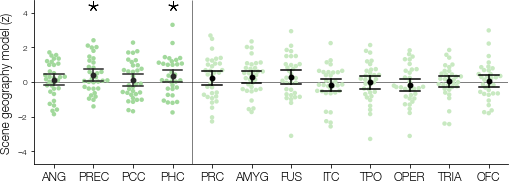

In [40]:
fig, ax = plt.subplots(figsize=figsize)
sig = figures.plot_zstat_perm(
    zstat_scene_hmx_use_geo, 'geo', 'geo', method='t', 
    sig_col='q', sig_alpha=0.1, by_network=True, ax=ax, **opt
)
fig.savefig(os.path.join(fig_dir, 'prsa_pmat_use_geo.pdf'))
sig

In [17]:
rsa.roi_zstat_perm(
    zstat_scene_hmx_reg_use_geo.query('roi == "PREC" or roi == "PHC"'), 'geo', 
    n_perm=100000, method='t'
)

,t,p,q,ERstar,rstarb,r,mean,std,sem,d
roi,,,,,,,,,,
PREC,1.84777,0.036949,0.068319,0.073859,1.0,1.0,0.309225,0.961354,0.167350,0.321656
PHC,0.05600,0.477845,0.663613,0.957520,2.0,2.0,0.010884,1.116478,0.194354,0.009748


## Comparing AT and PM

### Controlling for visual similarity

In [18]:
z = zstat_face_hmx_use[['subj_id', 'roi', 'net', 'net_id']].copy()
z['face'] = zstat_face_hmx_use['wiki_use1']
z['scene'] = zstat_scene_hmx_use['wiki_use1']

net_face = z.groupby(['subj_id', 'net'])['face'].mean().unstack()
net_scene = z.groupby(['subj_id', 'net'])['scene'].mean().unstack()

Is face semantics z-score greater in AT than in PM?

In [19]:
x = net_face['AT'] - net_face['PM']
p, p_cor = rsa.sign_perm(x.to_numpy()[:, None], 100000, tail='both')
df = x.agg(['mean', 'sem', 'std'])
df['d'] = df['mean'] / df['std']
print(f"mean={df['mean']}, sem={df['sem']}, p={p[0]}, d={df['d']}")

mean=0.287858178909072, sem=0.11043302136079401, p=0.014209857901420986, d=0.4537562806368813


In [20]:
x = net_scene['PM'] - net_scene['AT']
p, p_cor = rsa.sign_perm(x.to_numpy()[:, None], 100000, tail='both')
df = x.agg(['mean', 'sem', 'std'])
df['d'] = df['mean'] / df['std']
print(f"mean={df['mean']}, sem={df['sem']}, p={p[0]}, d={df['d']}")

mean=0.37925585601824063, sem=0.11006600942293446, p=0.0013499865001349986, d=0.5998216049556384


In [21]:
x = (net_face['AT'] - net_face['PM']) - (net_scene['AT'] - net_scene['PM'])
p, p_cor = rsa.sign_perm(x.to_numpy()[:, None], 100000, tail='both')
df = x.agg(['mean', 'sem', 'std'])
df['d'] = df['mean'] / df['std']
print(f"mean={df['mean']}, sem={df['sem']}, p={p[0]}, d={df['d']}")

mean=0.6671140349273126, sem=0.13748929125796266, p=3.999960000399996e-05, d=0.8446450366625806


### Controlling for visual similarity and subcategories

In [22]:
z = zstat_face_hmx_sub_use[['subj_id', 'roi', 'net', 'net_id']].copy()
z['face'] = zstat_face_hmx_sub_use['wiki_use1']
z['scene'] = zstat_scene_hmx_sub_typ_use['wiki_use1']

net_face = z.groupby(['subj_id', 'net'])['face'].mean().unstack()
net_scene = z.groupby(['subj_id', 'net'])['scene'].mean().unstack()

Is face semantics z-score greater in AT than in PM?

In [23]:
x = net_face['AT'] - net_face['PM']
p, p_cor = rsa.sign_perm(x.to_numpy()[:, None], 100000, tail='both')
df = x.agg(['mean', 'sem', 'std'])
df['d'] = df['mean'] / df['std']
print(f"mean={df['mean']}, sem={df['sem']}, p={p[0]}, d={df['d']}")

mean=0.2721580503182892, sem=0.11060478264500236, p=0.01990980090199098, d=0.42834165318999745


In [24]:
x = net_scene['PM'] - net_scene['AT']
p, p_cor = rsa.sign_perm(x.to_numpy()[:, None], 100000, tail='both')
df = x.agg(['mean', 'sem', 'std'])
df['d'] = df['mean'] / df['std']
print(f"mean={df['mean']}, sem={df['sem']}, p={p[0]}, d={df['d']}")

mean=0.2313052882557756, sem=0.12322006660958107, p=0.06846931530684693, d=0.3267737430892736


In [25]:
x = (net_face['AT'] - net_face['PM']) - (net_scene['AT'] - net_scene['PM'])
p, p_cor = rsa.sign_perm(x.to_numpy()[:, None], 100000, tail='both')
df = x.agg(['mean', 'sem', 'std'])
df['d'] = df['mean'] / df['std']
print(f"mean={df['mean']}, sem={df['sem']}, p={p[0]}, d={df['d']}")

mean=0.5034633385740648, sem=0.1453004350361304, p=0.001809981900180998, d=0.603175880490723
